Import relevant packages here.

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [111]:
data = pd.read_csv('cf_data.csv')
print(data.head())
print(data.tail())
print(data.info())


         dv        s         a
0 -0.743240  53.5427  1.242570
1 -0.557230  53.6120  1.777920
2 -0.454769  53.6541  0.544107
3 -0.525396  53.7030 -0.294755
4 -0.601285  53.7592 -0.290961
            dv        s         a
73903  5.19874  116.139 -0.795081
73904  5.10428  115.627 -0.314263
73905  5.13764  115.118  0.232283
73906  5.15348  114.599  0.262078
73907  5.25868  113.112 -0.612440
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73908 entries, 0 to 73907
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dv      73908 non-null  float64
 1   s       73908 non-null  float64
 2   a       73908 non-null  float64
dtypes: float64(3)
memory usage: 1.7 MB
None


In the ensuing, you will use <code>numpy</code>.

Let's create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [112]:
dv = np.linspace(-10, 10, 41)
s = np.linspace(0, 200, 21)
a = np.zeros((len(dv), len(s)))
np.size(a)

861

Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [113]:
DV = data.dv.to_numpy()
S = data.s.to_numpy()
A = data.a.to_numpy()

Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [114]:
# ...
'''
Given a grid point(x, y), 
1. calculate weigt based on data points (DV1, S1, A1), (DV2, S2, A2),..., (DVi, Si, Ai)

Inside a nested-loop, iterating data points:
function:
    for i in range(len(DV)):
        w_dvi = math.exp(-abs(DV{i}}-x)/1.5)
        W_si = math.exp(-abs(S{i}-y)/30)
        w{i} = w_dv1*w_s1
        Wi.append(w{i})
        
2. calculate Weighted sum
Weighted sum = sum(Wi*Ai)/sum(Wi)= W^ * A^ / W^ * [1 1 1 ...], 
where W^ = [w1, w2, w3, ..., w{i}], a 1*50 matrix, A^ = [A1, A2, ..., A{i}]T, a 50*1 matrix
[1 1 1...] is 50*1 matrix.
So the function become
function:
     for DV{i} in DV
        for S{i} in S
            w_dvi = math.exp(-abs(DV{i}}-x)/1.5)
            W_si = math.exp(-abs(S{i}-y)/30)
            w{i} = w_dv1*w_s1
            Wi.append(w{i})
    Weighted sum = sum(Wi*Ai)/sum(Wi)
    return Weighted sum 

3. loop for each grid point
A_sum = 0
Inside a nested-loop, iteratin all grid points:
for x in grid:
    for y in grid:
        do function
        a[i,j] = Weighted sum
'''
# in matrix form
import math
for j, y  in enumerate(s):
    for i, x in enumerate(dv):
        x_matrix = np.full(DV.shape, x); y_matrix = np.full(S.shape, y)
        w = np.exp(-np.abs(x_matrix-DV)/1.5 - np.abs(y_matrix-S)/30)
        # Using broadcasting property in python: w = np.exp(-np.abs(x - DV)/1.5 - np.abs(y-S)/30)
        a[i,j] = np.sum(w.T * A)/np.sum(w.T * np.full(w.shape, 1))
        # Using broadcasting property in python: a[i, j] = np.sum(w.T * A)/np.sum(w.T))

In [115]:
# in for-loop form
def weight(DV, S, A, dv, s, upsilon, sigma):
    weights = []
    weight_sums = []
    for i in range(len(DV)):
        weight_dv = math.exp(-abs(dv - DV[i])/upsilon)
        weight_s = math.exp(-abs(s - S[i])/sigma)
        weight = weight_dv * weight_s
        weight_sum = weight * A[i]
        weights.append(weight)
        weight_sums.append(weight_sum)
    weight_sum = sum(weight_sums)
    weight_sum_below = sum(weights)
    a = weight_sum/weight_sum_below
    return a


In [120]:
DV_subset = DV[:50]
S_subset = S[:50]
A_subset = A[:50]
upsilon = 1.5
sigma = 30
# unit test: given (dv[0], s[0])
b = weight(DV_subset, S_subset, A_subset, dv[10], s[0], upsilon, sigma)
print(b)

0.5899608479661312


In [121]:
upsilon = 1.5
sigma = 30
for i, x in enumerate(dv):
    for j, y in enumerate(s):
        print(f"Calculating grid point ({i}, {j})")
        b = weight(DV, S, A, x, y, upsilon, sigma)
        print(b)
        a[i, j] = b

Calculating grid point (0, 0)
0.5287902907474838
Calculating grid point (0, 1)
0.5315283748955577
Calculating grid point (0, 2)
0.5610065116703046
Calculating grid point (0, 3)
0.6190215259190258
Calculating grid point (0, 4)
0.6559602878761441
Calculating grid point (0, 5)
0.6653967014867364
Calculating grid point (0, 6)
0.6432296051271584
Calculating grid point (0, 7)
0.6105526310808174
Calculating grid point (0, 8)
0.5474711544941085
Calculating grid point (0, 9)
0.4819634971019053
Calculating grid point (0, 10)
0.40524633761252415
Calculating grid point (0, 11)
0.32539861884231164
Calculating grid point (0, 12)
0.2552385248433471
Calculating grid point (0, 13)
0.18034444745593683
Calculating grid point (0, 14)
0.1259213003037611
Calculating grid point (0, 15)
0.04122654762174682
Calculating grid point (0, 16)
-0.06122754093978396
Calculating grid point (0, 17)
-0.1709102393650614
Calculating grid point (0, 18)
-0.25525303797028914
Calculating grid point (0, 19)
-0.30027399736596927

The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

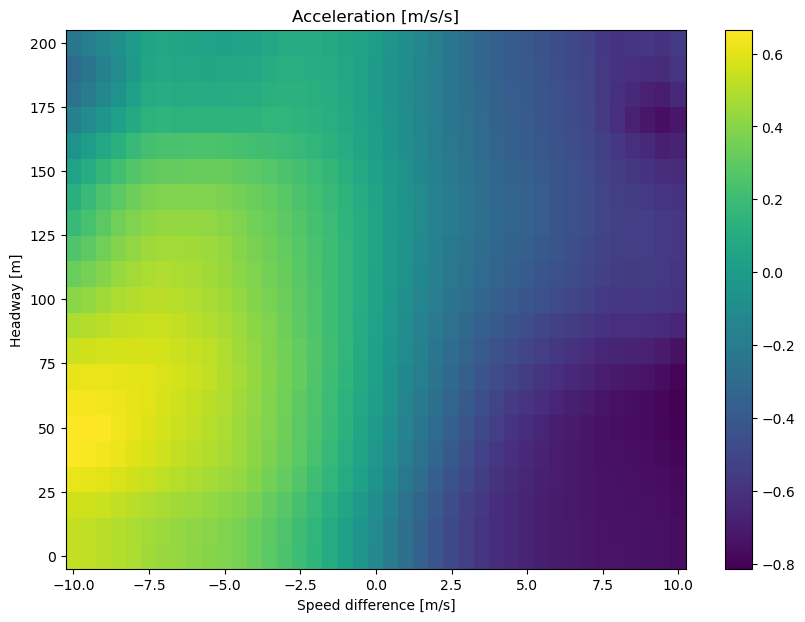

In [122]:
X, Y = np.meshgrid(dv, s)
axs = plt.axes()
p = axs.pcolor(X, Y, a.T, shading='nearest')
axs.set_title('Acceleration [m/s/s]')
axs.set_xlabel('Speed difference [m/s]')
axs.set_ylabel('Headway [m]')
axs.figure.colorbar(p);
axs.figure.set_size_inches(10, 7)